# Data Preprocess (MNIST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

# 데이터 불러오기
TensorFlow에서 제공해주는 데이터셋(MNIST) 예제 불러오기 

In [5]:
from tensorflow.keras import datasets
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

- 데이터의 shape

In [6]:
train_x.shape

(60000, 28, 28)

# Image Dataset 들여다보기

불러온 데이터셋에서 이미지 데이터 하나만 뽑아서 시각화까지 확인

- 데이터 하나만 뽑기

In [7]:
image = train_x[0]
image.shape

(28, 28)

- 시각화해서 확인

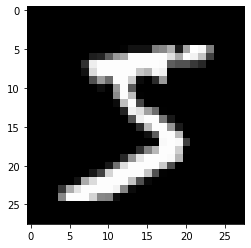

In [8]:
plt.imshow(image, 'gray')

# Channel 관련

[Batch Size, Height, Width, Channel]  
GrayScale이면 1, RGB이면 3으로 만들어줘야함

- 다시 shape로 데이터 확인

In [9]:
train_x.shape

(60000, 28, 28)

- 데이터 차원수 늘리기 (numpy)

In [11]:
train_x = np.expand_dims(train_x, -1)
train_x.shape

(60000, 28, 28, 1)

- TensorFlow 패키지 불러와 데이터 차원수 늘리기 (tensorflow)

In [14]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
new_train_x = tf.expand_dims(train_x, -1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

- TensorFlow 공홈에서 가져온 방법 tf.newaxis

In [15]:
train_x.shape

(60000, 28, 28)

In [16]:
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [18]:
train_x.reshape([60000, 28, 28, 1]).shape

(60000, 28, 28, 1)

**주의 사항**  
matplotlib로 이미지 시각화 할 때는 gray scale의 이미지는 3번쨰 dimension이 없으므로,  
2개의 dimension으로 gray scale로 차원 조절해서 넣어줘야함

- new_train_x[0] -> new_train_x[0, :, :, 0]

In [19]:
new_train_x.shape

TensorShape([60000, 28, 28, 1])

In [20]:
disp = new_train_x[0]

TypeError: Invalid shape (28, 28, 1) for image data

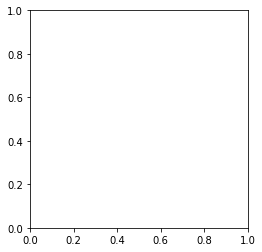

In [21]:
plt.imshow(disp, 'gray')

In [23]:
np.squeeze(new_train_x[0]).shape

(28, 28)

- 다시 시각화

In [22]:
disp = new_train_x[0, :, :, 0]
disp.shape

TensorShape([28, 28])

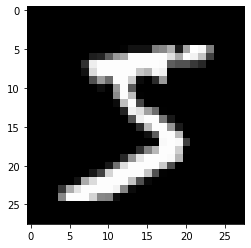

In [24]:
plt.imshow(disp, 'gray')

# Label Dataset 들여다보기  

Label 하나를 열어서 Image와 비교하여 제대로 들어갔는지. 어떤 식으로 저장 되어있는지 확인

- label 하나만 뽑아보기

In [25]:
train_y.shape

(60000,)

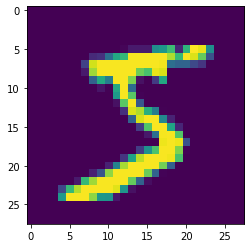

In [28]:
plt.imshow(train_x[0])

In [29]:
train_y[0]

5

- Label 시각화 

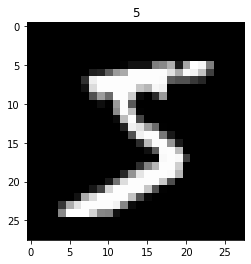

In [31]:
plt.title(train_y[0])
plt.imshow(train_x[0], 'gray')

# OneHot Encoding



컴퓨터가 이해할 수 있는 형태로 변환해서 Label을 주도록 함

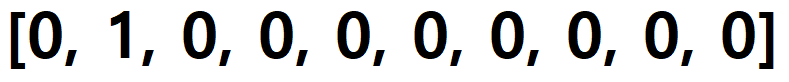

In [32]:
# 5
[0,0,0,0,0,1,0,0,0,0]

# 9
[0,0,0,0,0,0,0,0,0,1]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

- tensorflow.keras.utils.to_categorical

In [33]:
from tensorflow.keras.utils import to_categorical

- 1을 예시로 one hot encoding

In [34]:
to_categorical(1, 10)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
to_categorical(5, 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- label 확인해서 to_categorical 사용

In [37]:
label = train_y[0]
label

5

In [38]:
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- onehot encoding으로 바꾼 것과 이미지 확인

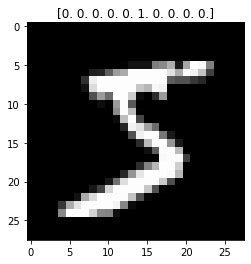

In [40]:
plt.title(label_onehot)
plt.imshow(train_x[0], 'gray')